## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산. 표본분산보다 조금 큰 값이 된다.
- 표준화: 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
    - 분산은 표본분산과 불편분산(unbiased variance)의 두 종류가 존재
    - 표본 분산은 표본에서 계산된 분산이며 보집다넹 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
    - 즉, 표본분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
    - 통계학에서는 이 비편항분산을 사용하는 경우가 많다.
    - 불편분산은 n대신 n-1로 나누어 구할 수 있다.

**[표본분산이 분산을 과소 평가하는 이슈]**
- 호수 안에 물고기가 7마리 있다. 몸 길이 {1, 2, 3, 4, 5, 6, 7}, 모평균 4, 샘플링1 3마리{1, 2, 3}, 표본평균 2, 샘플링2 {5, 6, 7} 표본평균 6
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계ㅏ산하며 분산을 과소평가하게 된다.
- 표본분산보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [79]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [2]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [3]:
score_df = pd.DataFrame({'score':scores},
                       index = pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))
score_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [4]:
# 평균값
print(sum(scores)/len(scores)) # 단순 계산
print(np.mean(scores)) # 넘파이 이용
print(score_df.mean()) # 판다스 이용

55.0
55.0
score    55.0
dtype: float64


In [5]:
# 중앙값
sorted_scores = np.sort(scores) # sort()는 원본값 반영X / 새로운 값에 저장을 하고 출력
print(sorted_scores)

[41 42 48 49 56 57 58 65 65 69]


In [6]:
n = len(sorted_scores)
if n%2==0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
else:
    median = sorted_scores[n//2-1]
print(median)

56.5


In [7]:
print(np.median(scores))
print(score_df.median())

56.5
score    56.5
dtype: float64


In [8]:
# 최빈값

pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [9]:
# 분산과 표준편차

scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [10]:
# 편차

mean = np.mean(scores)
print(mean)
deviation = scores - mean
deviation

55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [11]:
np.mean(deviation)

0.0

In [12]:
# 연습문제 - 20개 원소로 구성되는 배열을 만 후 평균, 편차의 합

arr = np.random.randint(0, 1000, size=20)
m = np.mean(arr)
dev = arr-m
display(dev)
display(np.sum(dev))

array([ 132., -266., -314., -432.,  280.,   13.,  422.,  215.,   80.,
       -347., -284.,   36.,  210.,  380., -232.,   76.,  284., -424.,
        -11.,  182.])

0.0

분산
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일때 해당됨. (ddof: degree of freedom)

In [13]:
np.mean(deviation ** 2) # 실제 값

86.0

In [14]:
np.var(scores) # 표본분산

86.0

In [15]:
score_df.var() # 불편분산(편향이 없는 분산/실제로 더 사실에 가까운 값을 산출)

score    95.555556
dtype: float64

In [16]:
df = score_df.copy()
df['deviation'] = deviation
df['square or deviation'] = deviation**2
display(df)

,score,deviation,square or deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [17]:
df.mean()

score                  55.0
deviation               0.0
square or deviation    86.0
dtype: float64

In [18]:
# 표준편차

np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [19]:
np.std(scores, ddof=0) # std(standard)
# np는 디폴트가 0 / ddof=0 생략 가능

9.273618495495704

In [20]:
df.std(ddof=0) # pd는 디폴트가 1 / ddof=1 생략 가능 but 표본분산을 산출할 때에는 ddof=0 필수

score                   9.273618
deviation               9.273618
square or deviation    74.315543
dtype: float64

In [21]:
# 범위와 4분위수 범위

np.max(scores) - np.min(scores)

28

In [22]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [23]:
# 요약 통계표

pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [24]:
# 데이터의 정규화

print(f'평균: {scores.mean()}, 표준편차: {scores.std().round(4)}')

평균: 55.0, 표준편차: 9.2736


In [25]:
# 표준화

z = (scores - np.mean(scores)) / np.std(scores)
# z.std() # 1에 가까운 수가 나옴
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [26]:
np.mean(z), np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

In [27]:
z = 50 + 10 * (scores -np.mean(scores)) / np.std(scores)

In [28]:
df = pd.read_csv('./data/ch2_scores_em.csv')
eng_scores = np.array(df.english)
pd.Series(eng_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [29]:
freq, _ = np.histogram(eng_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [30]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [31]:
# 계급값: 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨

class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [32]:
# 상대도수: 해당 계급의 데이터의 상대적인 비율

rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [33]:
# 누적상대도수: 해당 계급까지의 상대도수 합
# 누적해서 더해주는 것... 끝에는 1이 됨

cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [34]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


In [35]:
# 최빈값

freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

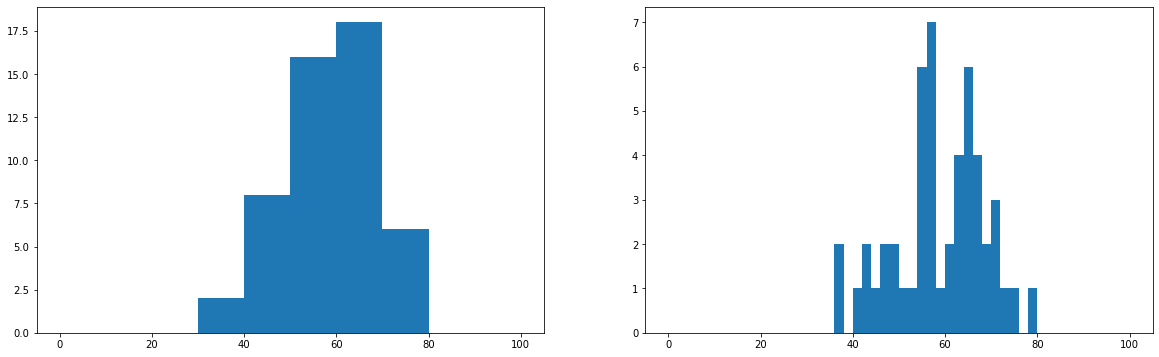

In [116]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
freq, _, _ = ax1.hist(eng_scores, bins=10, range=(0, 100)) # 3개의 객체가 나옴
freq, _, _ = ax2.hist(eng_scores, bins=50, range=(0, 100)) # 계급폭이 4점인 히스토그램 
ax.set_xlabel('score')
ax.set_ylabel('perosn number')
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()
plt.close()

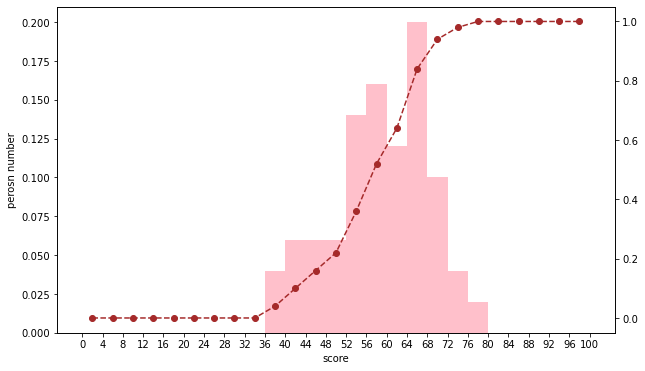

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음
weights = np.ones_like(eng_scores) / len(eng_scores)
rel_freq, _, _ = ax1.hist(eng_scores, bins=25, range=(0, 100), weights=weights, color='pink')

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='brown') # 상대 누적 그래프 / 꺾은선 표시
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('perosn number')
ax1.set_xticks(np.linspace(0, 100, 25+1))
plt.show()
plt.close()

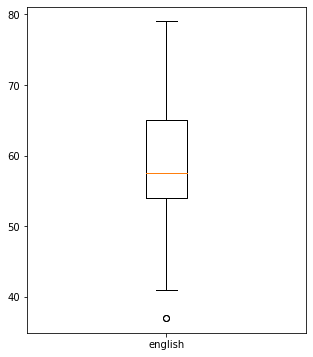

In [42]:
# 상자 그림

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(eng_scores, labels=['english'])
plt.show()
plt.close()

In [43]:
# 표본분산

data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
mu = np.sum(data)/len(data)
s = np.sum((data-mu)**2)/len(data) # 편차 제곱의 합 / 총 길이
s

1.2

In [44]:
# 불편분산

s1 = np.sum((data-mu)**2)/(len(data)-1)
s1

1.3333333333333333

In [67]:
# [과제] 1변향 데이터 data에 대하여 평균, 표본분산, 불편분산, 표준편차, 최대, 최소, 4분위수, 중앙값
# 단, 함수를 사용하는 경우와 사용하지 않는 경우를 모두 수행

data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

print('[함수를 사용하는 경우]')
print(f'- 평균: {np.mean(data)}')
print(f'- 중앙값: {np.median(data)}')
print(f'- 표본분산: {np.var(data)}')
print(f'- 불편분산: {np.var(data, ddof=1)}')
print(f'- 표준편차: {np.std(data)}(std) / {np.sqrt(np.var(data))}(분산에 제곱근)')
print(f'- 최대: {np.max(data)}')
print(f'- 최소: {np.min(data)}')
print(f'- 제1사분위: {np.quantile(data, 0.25)}')
print(f'- 제2사분위: {np.quantile(data, 0.50)}')
print(f'- 제3사분위: {np.quantile(data, 0.75)}')
print(f'- 제4사분위: {np.quantile(data, 1)}')

print()
print('[함수를 사용하지 않는 경우]')
print(f'- 평균: {sum(data)/len(data)}')
print(f'- 중앙값: {(data[len(data)//2-1]+data[len(data)//2])/2}')
print(f'- 표본분산: {sum((data-(sum(data)/len(data)))**2)/len(data)}')
print(f'- 불편분산: {sum((data-(sum(data)/len(data)))**2)/(len(data)-1)}')
print(f'- 표준편차: {(sum((data-(sum(data)/len(data)))**2)/len(data))**(1/2)}')
print(f'- 최대: {np.sort(data)[-1]}')
print(f'- 최소: {np.sort(data)[0]}')

print()
print(pd.Series(data).describe())

[함수를 사용하는 경우]
- 평균: 4.0
- 중앙값: 4.0
- 표본분산: 1.2
- 불편분산: 1.3333333333333333
- 표준편차: 1.0954451150103321(std) / 1.0954451150103321(분산에 제곱근)
- 최대: 6
- 최소: 2
- 제1사분위: 3.25
- 제2사분위: 4.0
- 제3사분위: 4.75
- 제4사분위: 6

[함수를 사용하지 않는 경우]
- 평균: 4.0
- 중앙값: 4.0
- 표본분산: 1.2
- 불편분산: 1.3333333333333333
- 표준편차: 1.0954451150103321
- 최대: 6
- 최소: 2

count    10.000000
mean      4.000000
std       1.154701
min       2.000000
25%       3.250000
50%       4.000000
75%       4.750000
max       6.000000
dtype: float64


## 2차원 데이터

In [46]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')

en_scores = np.array(df.english)[:10]
ms_scores = np.array(df.mathematics)[:10]

sdf = pd.DataFrame({'english':en_scores, 'mathematics':ms_scores},
                   index = pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))
sdf.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [47]:
# 공분산

dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english - dfc.english.mean()
dfc['math_deviation'] = dfc.mathematics - dfc.mathematics.mean()
dfc['product of deviation'] = dfc['eng_deviation']*dfc['math_deviation']
dfc

,english,mathematics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [48]:
dfc['product of deviation'].mean()

62.8

In [49]:
cov_mat = np.cov(en_scores, ms_scores, ddof=0)
cov_mat # en분산, en-ms분산 / ms-en분산, ms분산

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [50]:
np.var(en_scores, ddof=0), np.var(ms_scores, ddof=0)

(86.0, 68.44000000000001)

In [51]:
# 상관계수

np.cov(en_scores, ms_scores, ddof=0)[0, 1]/(np.std(en_scores)*np.std(ms_scores))

0.8185692341186713

In [52]:
np.corrcoef(en_scores, ms_scores) # np 활용

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [53]:
dfc[['english', 'mathematics']].corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [73]:
# [과제] 10행 2열 2차원 배열을 생성하고 두 열간의 공분산 및 상관계수 구하기
# 단, numpy, pands 두 가지 방법으로 모두 수행

art_s = np.random.randint(0, 101, size=(10))
gym_s = np.random.randint(0, 101, size=(10))
df = pd.DataFrame({'art':art_s, 'gym':gym_s},
                  index = pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], 
                                   name='student'))

display(df) # 배열 > 데이터프레임 변환
print()
print(f'공분산(np)> {np.cov(art_s, gym_s, ddof=0)[0, 1]}')
print(f'상관계수(np)> {np.cov(art_s, gym_s, ddof=0)[0, 1]/(np.std(art_s)*np.std(gym_s))}')
print()
print(f'공분산(pd)> {((df.art-df.art.mean())*(df.gym-df.gym.mean())).mean()}')
print(f'상관계수(pd)> {df.corr().iloc[0, 1]}')

,art,gym
student,,
A,44,32
B,23,33
C,73,61
D,13,56
E,30,10
F,60,24
G,96,19
H,78,36
I,11,52



공분산(np)> 26.530000000000015
상관계수(np)> 0.046934530289084266

공분산(pd)> 26.529999999999994
상관계수(pd)> 0.046934530289084266


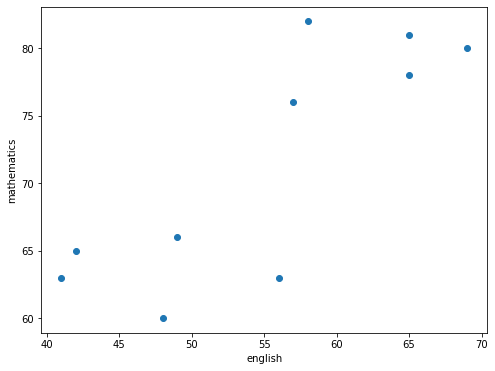

In [74]:
# 산점도

df2 = dfc[['english', 'mathematics']]
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(df2.english, df2.mathematics)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()
plt.close()

다항곡선 회귀분석

기본문법: p = polyfit(x, y, n)

https://qlsenddl-lab.tistory.com/48

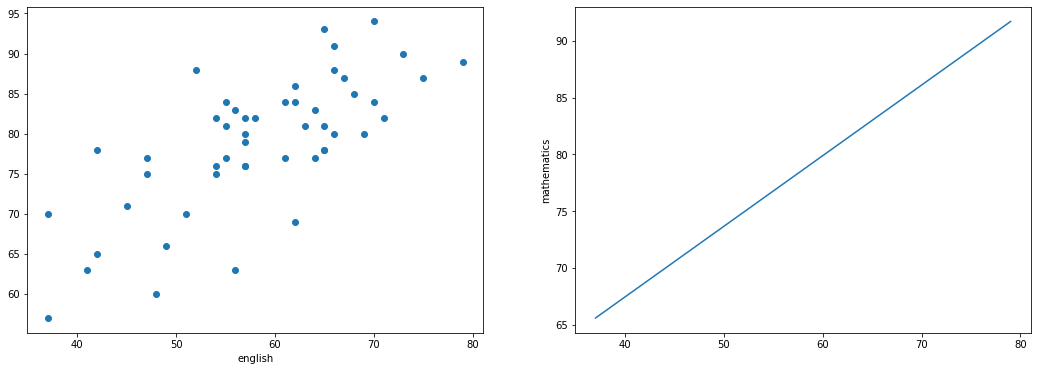

In [123]:
# 회귀직선

eng_scores =  np.array(df['english'])
math_scores = np.array(df['mathematics'])

# 계수 구하기
poly_fit = np.polyfit(eng_scores, math_scores, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(eng_scores.min(), eng_scores.max())
ys = poly_1d(xs)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(eng_scores, math_scores)
ax2.plot(xs, ys)
ax1.set_xlabel('english')
ax1.set_xlabel('english')
ax2.set_ylabel('mathematics')
ax2.set_ylabel('mathematics')
plt.show()

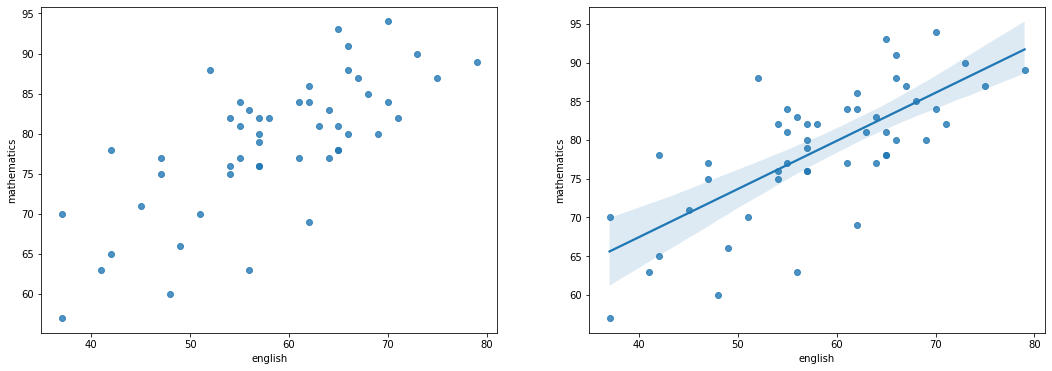

In [122]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)
sns.regplot(ax=axes[0], x=df.english, y=df.mathematics, fit_reg=False)
sns.regplot(ax=axes[1], x=df.english, y=df.mathematics)
plt.show()

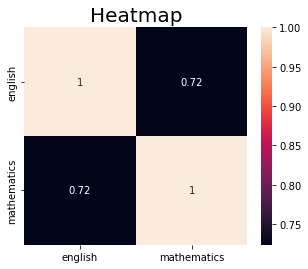

In [148]:
# 연습문제 - english와 mathematics 두 변수의 상곤관계를 히트맵으로 포현

plt.figure(figsize=(5, 4))
sns.heatmap(df[['english', 'mathematics']].corr(), annot=True)
plt.title('Heatmap', fontsize=20)
plt.show()
plt.close()

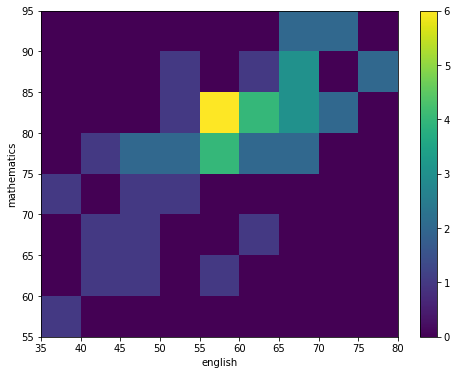

In [141]:
# hist2d 메소드로 히트맵 작성

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

c = ax.hist2d(eng_scores, math_scores,
             bins=[9, 8], range=[(35, 80), (55, 95)])
# print(c)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3], ax=ax)

In [154]:
anscombe_data = np.load('./data/ch3_anscombe.npy')
anscombe_data[0]

array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [172]:
stats_df = pd.DataFrame(index = ['X_mena', 'X_variance', 'Y_mean', 'Y_variance', 'X&Y_correlation', 'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] = [f'{np.mean(dataX): .2f}',
                               f'{np.var(dataX): .2f}',
                               f'{np.mean(dataY): .2f}',
                               f'{np.var(dataY): .2f}',
                               f'{np.corrcoef(dataX, dataY)[0, 1]: .2f}',
                               f'{ploy_fit[1]: .2f}+{ploy_fit[0]: .2}x']
stats_df

,data1,data2,data3,data4
X_mena,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+ 0.5x,3.00+ 0.5x,3.00+ 0.5x,3.00+ 0.5x


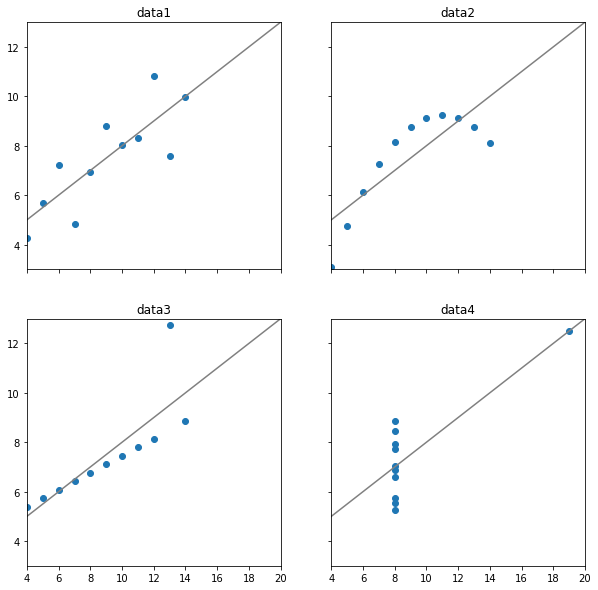

In [174]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    ploy_fit = np.polyfit(data[:, 0], data[:, 1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:, 0], data[:, 1])
    ax.plot(xs, ys, color='gray')
    
plt.tight_layout
plt.show()

<AxesSubplot:xlabel='english', ylabel='mathematics'>

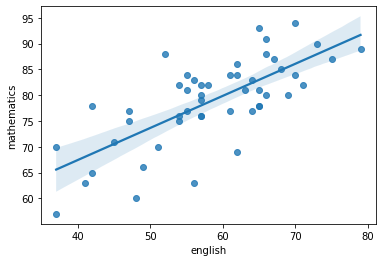

In [127]:
import warnings
warnings.filterwarnings('ignore')

sns.regplot('english', 'mathematics', df)

In [96]:
import pandas as pd
fdf = pd.read_csv('./data/5_2_fm.csv')
fdf

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [107]:
# 연습문제 - species 그룹별 통계량

fish_a = fdf.query('species=="A"')[['length']]
display(fish_a.describe())

fish_b = fdf.query('species=="B"')[['length']]
display(fish_b.describe())

,length
count,3.0
mean,3.0
std,1.0
min,2.0
25%,2.5
50%,3.0
75%,3.5
max,4.0


,length
count,3.0
mean,8.0
std,2.0
min,6.0
25%,7.0
50%,8.0
75%,9.0
max,10.0


In [176]:
fdf.groupby('species').describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [97]:
sdf = pd.read_csv('./data/5_2_shoes.csv')
sdf

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [185]:
# 연습문제 - 각 store 컬러별 판매량을 파악할 수 있는 피봇 테이블 작성

display(sdf.pivot_table(index='store',
               columns='color',
               values='sales'))

display(sdf.pivot_table(index=['store', 'color'],
               values='sales'))

color,blue,red
store,,
osaka,13,9
tokyo,10,15


sales
store color       
osaka blue      13
      red        9
tokyo blue      10
      red       15

In [178]:
cdf = pd.read_csv('./data/4_cov.csv')
cdf

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [189]:
# 연습문제 - x, y의 공분산

print(np.cov(cdf.x, cdf.y, ddof=1)[0, 1])

7.673333333333335


In [188]:
x_dev = cdf.x-cdf.x.mean()
y_dev = cdf.y-cdf.y.mean()
print(np.cov(x_dev, y_dev, ddof=1)) # 불편분산이어야만 함 

[[ 3.64622222  7.67333333]
 [ 7.67333333 28.01111111]]


In [191]:
# 연습문제 - 상관행렬

np.corrcoef(x_dev, y_dev)

array([[1.       , 0.7592719],
       [0.7592719, 1.       ]])